In [1]:
# Import des fonctions définies dans saint_dtSet.py
from dataset_build.saint_dtSet import (
    generate_qubit_tomography_dataset_base,
    add_mle_from_means,
    build_purity_classification_dataset,
)

Aperçu du dataset de base :


,X_mean,Y_mean,Z_mean,X_real,Y_real,Z_real,theta_ideal,phi_ideal,X_ideal,Y_ideal,Z_ideal
0,-0.82,0.30,0.50,-0.775602,0.313423,0.547912,0.990930,2.757555,-0.775602,0.313423,0.547912
1,0.44,-0.44,0.04,0.547965,-0.459608,0.013994,1.542347,5.388285,0.625343,-0.779831,0.028446
2,-0.66,-0.66,0.04,-0.563533,-0.819237,0.106208,1.464388,4.109847,-0.563533,-0.819237,0.106208
3,0.34,-0.08,0.94,0.245010,-0.027257,0.969137,0.249090,6.172392,0.245010,-0.027257,0.969137
4,-0.82,-0.42,-0.42,-0.854523,-0.364031,-0.370501,1.950344,3.544314,-0.854523,-0.364031,-0.370501



Dimensions du dataset : (3000, 11)


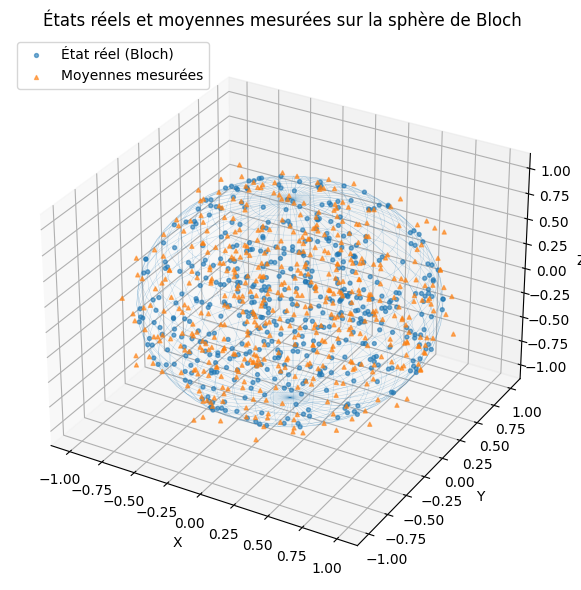

In [2]:
# cellule 1 : imports + génération d'un dataset de base et plot sur la sphère de Bloch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour les plots 3D



# 1) Générer un dataset de base (sans MLE)
df_base = generate_qubit_tomography_dataset_base(
    n_states=3000,
    n_shots=100,
    mode="finite_shots",
    include_ideal=True,
    include_csv=False,
    include_decoherence=True,
    decoherence_level=0.6,
    random_state=42,
)

print("Aperçu du dataset de base :")
display(df_base.head())

print("\nDimensions du dataset :", df_base.shape)

# 2) Plot rapide sur la sphère de Bloch (états RÉELS vs moyennes mesurées)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Sphère unité filaire pour la sphère de Bloch
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 25)
xs = np.outer(np.cos(u), np.sin(v))
ys = np.outer(np.sin(u), np.sin(v))
zs = np.outer(np.ones_like(u), np.cos(v))
ax.plot_wireframe(xs, ys, zs, linewidth=0.3, alpha=0.3)

# Quelques points réels
sample_df = df_base.sample(n=500, random_state=0)

ax.scatter(
    sample_df["X_real"],
    sample_df["Y_real"],
    sample_df["Z_real"],
    s=8,
    alpha=0.6,
    label="État réel (Bloch)"
)

# Quelques points mesurés (moyennes)
ax.scatter(
    sample_df["X_mean"],
    sample_df["Y_mean"],
    sample_df["Z_mean"],
    s=8,
    alpha=0.6,
    marker="^",
    label="Moyennes mesurées"
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("États réels et moyennes mesurées sur la sphère de Bloch")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


Aperçu du dataset avec MLE :


,X_mean,Y_mean,Z_mean,X_real,Y_real,Z_real,theta_ideal,phi_ideal,X_ideal,Y_ideal,Z_ideal,X_mle,Y_mle,Z_mle,theta_mle,phi_mle
0,-0.82,0.30,0.50,-0.775602,0.313423,0.547912,0.990930,2.757555,-0.775602,0.313423,0.547912,-0.814963,0.298157,0.496929,1.050741,2.790865
1,0.44,-0.44,0.04,0.547965,-0.459608,0.013994,1.542347,5.388285,0.625343,-0.779831,0.028446,0.440000,-0.440000,0.040000,1.530786,-0.785398
2,-0.66,-0.66,0.04,-0.563533,-0.819237,0.106208,1.464388,4.109847,-0.563533,-0.819237,0.106208,-0.660000,-0.660000,0.040000,1.530786,-2.356194
3,0.34,-0.08,0.94,0.245010,-0.027257,0.969137,0.249090,6.172392,0.245010,-0.027257,0.969137,0.339052,-0.079777,0.937379,0.355769,-0.231091
4,-0.82,-0.42,-0.42,-0.854523,-0.364031,-0.370501,1.950344,3.544314,-0.854523,-0.364031,-0.370501,-0.809859,-0.414806,-0.414806,1.998526,-2.668237


MSE(X_mle vs X_real) : 0.007032422174423394
MSE(Y_mle vs Y_real) : 0.007264609748407885
MSE(Z_mle vs Z_real) : 0.007197342313397203
Norme moyenne de l'erreur sur le vecteur de Bloch : 0.13245971444387408


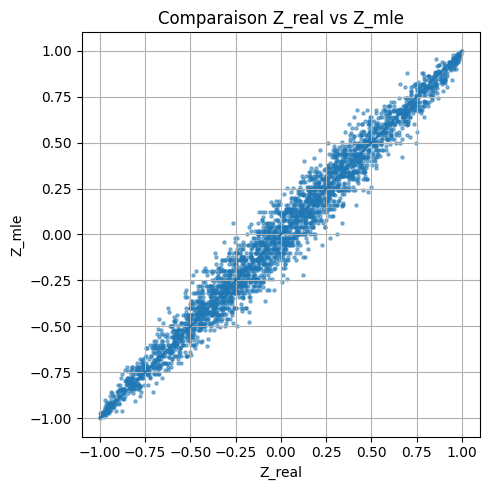

In [3]:
# Cellule 2 : calcul des estimés MLE et comparaison avec l'état réel

# On part du df_base défini plus haut

# 1) Ajout des colonnes MLE
df_mle = add_mle_from_means(df_base, projection_on_bloch_ball=True)

print("Aperçu du dataset avec MLE :")
display(df_mle.head())

# 2) Calcul d'erreurs simples entre MLE et état réel
#    On calcule la MSE et la norme moyenne de l'erreur sur le vecteur de Bloch

delta_X = df_mle["X_mle"] - df_mle["X_real"]
delta_Y = df_mle["Y_mle"] - df_mle["Y_real"]
delta_Z = df_mle["Z_mle"] - df_mle["Z_real"]

mse_X = np.mean(delta_X**2)
mse_Y = np.mean(delta_Y**2)
mse_Z = np.mean(delta_Z**2)

# Norme de l'erreur sur le vecteur de Bloch (par point)
err_norm = np.sqrt(delta_X**2 + delta_Y**2 + delta_Z**2)
mean_err_norm = np.mean(err_norm)

print("MSE(X_mle vs X_real) :", mse_X)
print("MSE(Y_mle vs Y_real) :", mse_Y)
print("MSE(Z_mle vs Z_real) :", mse_Z)
print("Norme moyenne de l'erreur sur le vecteur de Bloch :", mean_err_norm)

# 3) Visualisation 2D simple MLE vs réel (par exemple sur Z)
plt.figure(figsize=(5, 5))
plt.scatter(df_mle["Z_real"], df_mle["Z_mle"], s=5, alpha=0.5)
plt.plot([-1, 1], [-1, 1])  # diagonale parfaite
plt.xlabel("Z_real")
plt.ylabel("Z_mle")
plt.title("Comparaison Z_real vs Z_mle")
plt.grid(True)
plt.tight_layout()
plt.show()


Aperçu du dataset de classification :


,X_mean,Y_mean,Z_mean,X_real,Y_real,Z_real,theta_ideal,phi_ideal,X_ideal,Y_ideal,Z_ideal,bloch_radius_real,is_pure,label_purity
0,-0.72,0.48,-0.64,-0.600751,0.605307,-0.522208,2.120234,2.352417,-0.600751,0.605307,-0.522208,1.000000,True,1
1,0.78,0.22,0.28,0.621251,0.161270,0.365793,0.960408,0.215226,0.800520,0.175003,0.573185,0.738759,False,0
2,0.24,-0.38,0.04,0.317591,-0.224020,-0.009667,1.605306,5.893862,0.924615,-0.379337,-0.034503,0.388771,False,0
3,0.52,0.86,0.20,0.395767,0.847228,0.354364,1.208563,1.133788,0.395767,0.847228,0.354364,1.000000,True,1
4,-0.72,0.04,0.02,-0.674180,0.029459,0.021668,1.538790,3.100833,-0.998658,0.040727,0.032001,0.675172,False,0



Taille finale du dataset de classification : (6952, 14)

Répartition des labels (1 = pur, 0 = mixte) :
label_purity
1    0.5
0    0.5
Name: proportion, dtype: float64


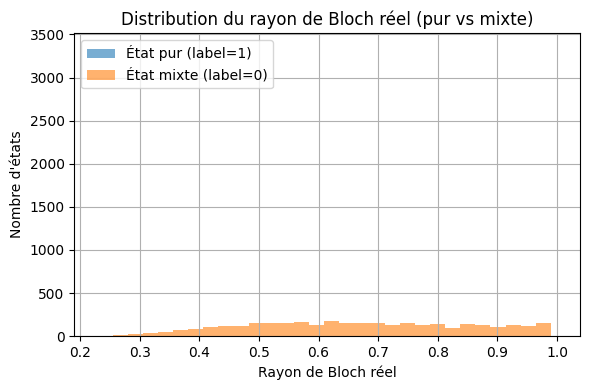


Accuracy SVM pur/mixte : 0.899352983465133

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       696
           1       0.85      0.98      0.91       695

    accuracy                           0.90      1391
   macro avg       0.91      0.90      0.90      1391
weighted avg       0.91      0.90      0.90      1391



In [4]:
# Cellule 3 : construction et inspection du dataset de classification pur vs mixte

# 1) Construction du dataset de classification
df_clf, X_clf, y_clf = build_purity_classification_dataset(
    n_states_total=8000,   # nombre d'états simulés avant filtrage
    n_shots=100,           # shots par observable
    mixed_proportion=0.5,  # proportion cible d'états mixtes
)

print("Aperçu du dataset de classification :")
display(df_clf.head())

print("\nTaille finale du dataset de classification :", df_clf.shape)

print("\nRépartition des labels (1 = pur, 0 = mixte) :")
print(y_clf.value_counts(normalize=True))

# 2) Vérification rapide : distribution du rayon de Bloch réel
plt.figure(figsize=(6, 4))
df_clf[df_clf["label_purity"] == 1]["bloch_radius_real"].hist(
    bins=30, alpha=0.6, label="État pur (label=1)"
)
df_clf[df_clf["label_purity"] == 0]["bloch_radius_real"].hist(
    bins=30, alpha=0.6, label="État mixte (label=0)"
)
plt.xlabel("Rayon de Bloch réel")
plt.ylabel("Nombre d'états")
plt.title("Distribution du rayon de Bloch réel (pur vs mixte)")
plt.legend()
plt.tight_layout()
plt.show()

# (Optionnel) 3) Petit test avec un SVM binaire
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=0, stratify=y_clf
)

clf = SVC(kernel="rbf", C=1.0, gamma="scale")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nAccuracy SVM pur/mixte :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
